In [1]:
import pandas as pd

from portfawn.market_data import MarketData
from portfawn.portfolio import MultiPortoflio

%matplotlib inline

In [2]:
## Parameters
# market data

tickers = {"S&P 500": "IVV", 
           "Small-Cap": "IJR",
           'ACWI ex U.S.': 'ACWX',
           "Emerging Markets": "IEMG", 
           "Global REIT": "REET", 
           'U.S. Real Estate': 'IYR',
           'Aggregate Bond': 'AGG',
           'Gold': 'GLD',
           'Corporate Bond ': 'HYG'
          }
# tickers = {"XRE": "XRE.TO",
#            'VRE': 'VRE.TO',
#            "ZRE": "ZRE.TO", 
#            "RIT": "RIT.TO", 
#            'PHR': 'PHR.TO',
#            'CGR': 'CGR.TO'}
# date
start_date = "2020-01-01"
end_date   = "2020-12-31"

# portfolio
portfolio_fitness_list = ["EWP", "MSRP", "MRP", "MVP", "BMOP"]

risk_free_rate = 0.00
sampling_params = {"type": "standard"}
optimization_params = {
    "scipy_params": {
        "maxiter": 1000,
        "disp": False,
        "ftol": 1e-10,
    },
    "target_return": 0.2,
    "target_risk": 0.05,
    "weight_bound": (0.02, 0.98),
}

In [3]:
## Create the market instance
market_data = MarketData(
    tickers = tickers,
    date_start = start_date,
    date_end = end_date,
    col_price = "Close",
)
data_returns = market_data.data_returns

In [4]:
multi_portfolio = MultiPortoflio(portfolio_fitness_list=portfolio_fitness_list,
                                 data_returns=data_returns,
                                 risk_free_rate=risk_free_rate,
                                 sampling_params=sampling_params,
                                 optimization_params=optimization_params,
                                )

In [5]:
multi_portfolio.generate()

/media/veracrypt4/My Projects/projects/PortFawn/venv/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


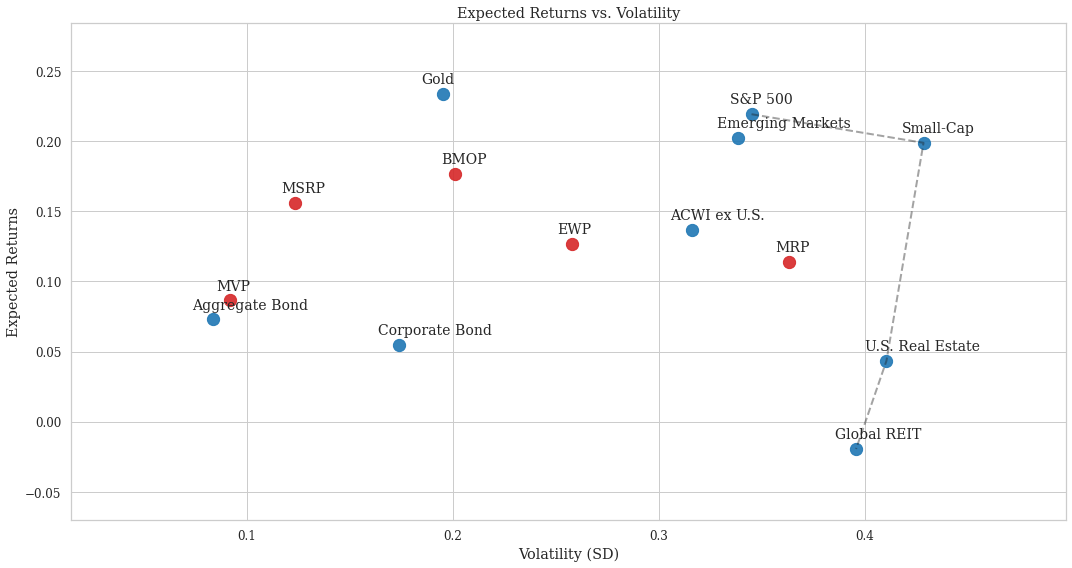

In [6]:
fig, ax = multi_portfolio.plot_portfolio()